<center><img src=https://www.toronto.ca/wp-content/uploads/2023/10/9744-Cycling-Network-graphic-2023-10-31-1024x338.png /></center>

<center><h1>City Bike Planning</h1></center>
<center>Collaborators: Ankith Bachhu, Shaunak Roy, Dominick Cardone, Daniel Lu</center>

## Table of Contents
1. [Introduction](#Introduction) <br> 
2. [Part 1: Data Collection](#Part-1:-Data-Collection) <br>
3. [Part 2: Data Cleaning & Exploratory Analysis](#Part-2:-Data-Cleaning-&-Exploratory-Analysis) <br>
4. [Part 3: Model Training and Testing](#Part-3:-Model-training-and-testing) <br>
5. [Part 4: Interpretation of Results](#Part-4:-Interpretation-of-Results) <br>
6. [Conclusion](#Conclusion) <br>
7. [References](#References)

## Introduction
The purpose of this tutorial is to walk you through the data science lifecycle, introducing you to many different data science concepts. The data science lifecycle goes as follows: 
1. Data collection
3. Data processing
4. Exploratory analysis and Data visualization
5. Model analysis and testing
6. Interpretation of results

The whole purpose of the data science lifecycle is to identify trends or patterns, investigate or answer a question, or solve a problem. In this tutorial, we will be looking to answer the question: SOMETHING SOMETHING SOMETHING. By coming up with a answer, we will be able to SOMETHING SOMETHING SOMETHING. 

**IMPORTANT** 
<br>For this tutorial there may be some key terms you need to be familiar with:
- Observation: Refers to a row...
**May not need this section, if there are no other key terms, cuz I can refer to observations as just bike rides instead**

**We will dive into the purpose behind each step as we continue on deeper later, and then we talk about the importance of this tutorial in terms of city bike planning, maybe something related to enviromental friendly etc.**

## Part 1: Data Collection
In order to reach our end goal and finding OUR GOAL FOR QUESTION OR PROBLEM OR SOMETHING SOMETHING, we must first begin by collecting the data necessary to answer our question. It is important to find the appropriate dataset for your situation, as later on, your machine learning model is as good as the data you feed into it. And since your machine learning model is the tool that will be used to find the answer to your question, then essentially your answer is reliant on the dataset you use. Therefore, it is important to collect the appropriate dataset.

Usually, a company may have to conduct their own experiments or studies to collect the necessary data they need. However, oftentimes, these tasks are already done by other companies, and avaialble to use for the public. For our tutorial, we will be using a dataset provided by Capital Bike Share.

**MAYBE talk about the creidbilty behind Capital Bike Share a little bit.**


<center><img src="https://www.jotform.com/blog/wp-content/uploads/2019/10/Quantitative-data-collection-methods-1-700x545.png"></center>

### Import Python Libraries
To begin this tutorial, we first need to import the necessary Python libraries (as shown below), which will be used for this tutorial. You should use Jupyter Notebook, as most of the code provided is run in Jupyter Notebook. Jupyter Notebook is also widely used by data scientists, as it allows us to better visualize our data and other analysis. We will dive more in detail about the use of each of these libraries as we encounter and use each one.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns

# Filter out the warnings
import warnings
warnings.filterwarnings("ignore")

/Users/ankithb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Download and import the data
Navigate to https://s3.amazonaws.com/capitalbikeshare-data/index.html and download any of the zip files. Extract the csv file from the zip file, and **make sure you move it to the same folder** as the one in which you are running your python program or Jupyter Notebook. For the purpose of this tutorial, it would be helpful to download the same zip file we did, if you want to compare your results with the tutorial's.

In [101]:
# Read in the csv file
df = pd.read_csv(r"202402-capitalbikeshare-tripdata.csv")

If you downloaded the same csv file, run the code below, and compare your results, it should be the same.

In [102]:
# Print out the head of the table imported
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,24DBACC298E33BF6,electric_bike,2/1/24 21:18,2/1/24 21:27,Eckington Pl & Q St NE,31505.0,5th & K St NW,31600.0,38.910893,-77.005023,38.90304,-77.019027,member
1,FE1067800A18BC56,electric_bike,2/6/24 17:15,2/6/24 17:30,4th & C St SW,31243.0,NaN,NaN,38.886443,-77.017388,38.91000,-76.980000,member
2,AD1962B215B5879D,electric_bike,2/26/24 13:19,2/26/24 13:30,North Capitol St & F St NW,31624.0,NaN,NaN,38.896907,-77.009684,38.90000,-77.010000,member
3,3F8352E6D9EC4F85,electric_bike,2/2/24 11:01,2/2/24 11:05,1st & K St NE,31662.0,NaN,NaN,38.902394,-77.005614,38.90000,-77.010000,member
4,D656DA87FA915F14,electric_bike,2/25/24 8:28,2/25/24 8:48,Virginia Ave & 25th St NW,31297.0,NaN,NaN,38.898456,-77.053075,38.91000,-77.060000,member


## Part 2: Data Cleaning & Exploratory Data Analysis
Now that we have our data, the next step is to clean our data. *What does it mean to clean our data?* It is exactly how it sounds, we will need to make changes to our data in order to make it ready to be processed by our machine learning model or just easier for us to analyze. This process may involve many different things, some examples are:
* Deleting unnecessary data
* Filling in missing data
* Changing the values or metrics/measurements of our data
* Calculating new data point from existing data
* Reordering data in a new way that makes it easier to read or work with machine learning model???<br>

Now, you may have noticed we combined two steps of the data science lifecycle: Data cleaning & Exploratory Analysis. We've combined these two steps, because sometimes it is helpful to perform exploratory analysis on our dataset, in order to help determine what things we need to clean. For example, we may plot a graph of two data points, in order to see if there any noticeable trends, which may prompt us to create a new data point, that we may believe to be useful for the machine learning model to use.

In simple terms, exploratory analysis, is performing any sort of analysis on your dataset before we pass it into the machine learning model. This process may involve creating graphs or plotting values of a certain data point. Essentially, we may be trying to answer the question before passing it into the machine learning model, making any predictions or identifying any trends, which may prove useful in interpreting our results later on after the machine learning model. This analysis may also help guide our question or research, as mentioned earlier, where we may notice one data point is significant in some sort of way.

**PLEASE FACT CHECK WHAT IM WRITING**

<center><img src="https://www.jotform.com/blog/wp-content/uploads/2019/10/data-collection-methods-700x545.png"></center>

First let's list out some information about each column (aka our data points). This step will help us see if there are any data types which we may need to change for the purpose of being able to calculate additonal data points and be used in our machine learning model.

In [103]:
# List out information about each of the entries of the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318688 entries, 0 to 318687
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             318688 non-null  object 
 1   rideable_type       318688 non-null  object 
 2   started_at          318688 non-null  object 
 3   ended_at            318688 non-null  object 
 4   start_station_name  270637 non-null  object 
 5   start_station_id    270637 non-null  float64
 6   end_station_name    267827 non-null  object 
 7   end_station_id      267824 non-null  float64
 8   start_lat           318688 non-null  float64
 9   start_lng           318688 non-null  float64
 10  end_lat             318444 non-null  float64
 11  end_lng             318444 non-null  float64
 12  member_casual       318688 non-null  object 
dtypes: float64(6), object(7)
memory usage: 31.6+ MB


### Drop Some Unnecessary Data
Next, let's drop some unnecessary data. *How did we determine that this data was unnecessary?* We dropped the IDs because they are random and essentially function the same as indexes, providing no meaningful information.

In [104]:
# Drop start and end station id columns
df.drop(["start_station_id", "end_station_id"], axis=1, inplace=True)

# Drop ride id column
df.drop(["ride_id"], axis=1, inplace=True)

In [105]:
# List out unique bike types
df["rideable_type"].unique()

array(['electric_bike', 'classic_bike'], dtype=object)

Let's drop some of the observations which are missing entries or data points. This step is important, as having observations with missing data points may lead to errors when running code later. It also doesn't make sense to incldue them, since if our machine learning model relies on data points to make predictions, if a datapoint has no value, it could interefere or screw with our predictions. Our dataset is large enough and the amount of missing data is small enough that we can safely ignore it without hindering out predictions.

In [106]:
# Drop any observations, where there are missing entries or data points
df.dropna(axis=0, inplace=True)

In [107]:
# List out info of columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246639 entries, 0 to 318687
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   rideable_type       246639 non-null  object 
 1   started_at          246639 non-null  object 
 2   ended_at            246639 non-null  object 
 3   start_station_name  246639 non-null  object 
 4   end_station_name    246639 non-null  object 
 5   start_lat           246639 non-null  float64
 6   start_lng           246639 non-null  float64
 7   end_lat             246639 non-null  float64
 8   end_lng             246639 non-null  float64
 9   member_casual       246639 non-null  object 
dtypes: float64(4), object(6)
memory usage: 20.7+ MB


In [108]:
# Print out table again to check it
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2/1/24 21:18,2/1/24 21:27,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,member
16,electric_bike,2/15/24 16:46,2/15/24 16:59,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,member
17,classic_bike,2/7/24 17:42,2/7/24 18:12,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,member
18,classic_bike,2/22/24 16:43,2/22/24 16:56,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,member
19,classic_bike,2/10/24 1:11,2/10/24 1:23,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,casual


This step is more specific for pandas Dataframe, but nonetheless important. It resets our indices to be in order from 0,1,..., some integer. As we can see above, the indices are scattered, skipping from 0 to 16. These indices may prevent us from performing other data cleaning later on, as well as causing potential errors.

In [109]:
# Reset indices of table and print out table again to check it
df.reset_index(drop=True, inplace=True)
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2/1/24 21:18,2/1/24 21:27,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,member
1,electric_bike,2/15/24 16:46,2/15/24 16:59,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,member
2,classic_bike,2/7/24 17:42,2/7/24 18:12,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,member
3,classic_bike,2/22/24 16:43,2/22/24 16:56,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,member
4,classic_bike,2/10/24 1:11,2/10/24 1:23,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,casual


Next, let's convert the data types of our data points. Specifically in this case, we are converting our strings to be datetime objects, as converting it to datetime objects will allow us to perform necessary operations or arithmetic later.

In [110]:
# Convert datatypes to datetime objects
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# List out columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246639 entries, 0 to 246638
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       246639 non-null  object        
 1   started_at          246639 non-null  datetime64[ns]
 2   ended_at            246639 non-null  datetime64[ns]
 3   start_station_name  246639 non-null  object        
 4   end_station_name    246639 non-null  object        
 5   start_lat           246639 non-null  float64       
 6   start_lng           246639 non-null  float64       
 7   end_lat             246639 non-null  float64       
 8   end_lng             246639 non-null  float64       
 9   member_casual       246639 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 18.8+ MB


In [111]:
# Print out top of table to check
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2024-02-01 21:18:00,2024-02-01 21:27:00,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,member
1,electric_bike,2024-02-15 16:46:00,2024-02-15 16:59:00,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,member
2,classic_bike,2024-02-07 17:42:00,2024-02-07 18:12:00,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,member
3,classic_bike,2024-02-22 16:43:00,2024-02-22 16:56:00,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,member
4,classic_bike,2024-02-10 01:11:00,2024-02-10 01:23:00,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,casual


Let's perform some arithemtic with our datetime objects we converted earlier. We are subtracting the start and end times, in order to calculate a new data point, which is the duration of the bike ride. We then need to convert it into total number of minutes.

In [112]:
# Create new column and data point time duration
df["time_duration"] = (df["ended_at"] - df["started_at"]).dt.total_seconds()/60

# Print out top of table to check again
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,time_duration
0,electric_bike,2024-02-01 21:18:00,2024-02-01 21:27:00,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,member,9.0
1,electric_bike,2024-02-15 16:46:00,2024-02-15 16:59:00,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,member,13.0
2,classic_bike,2024-02-07 17:42:00,2024-02-07 18:12:00,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,member,30.0
3,classic_bike,2024-02-22 16:43:00,2024-02-22 16:56:00,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,member,13.0
4,classic_bike,2024-02-10 01:11:00,2024-02-10 01:23:00,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,casual,12.0


In [113]:
# List out column infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246639 entries, 0 to 246638
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       246639 non-null  object        
 1   started_at          246639 non-null  datetime64[ns]
 2   ended_at            246639 non-null  datetime64[ns]
 3   start_station_name  246639 non-null  object        
 4   end_station_name    246639 non-null  object        
 5   start_lat           246639 non-null  float64       
 6   start_lng           246639 non-null  float64       
 7   end_lat             246639 non-null  float64       
 8   end_lng             246639 non-null  float64       
 9   member_casual       246639 non-null  object        
 10  time_duration       246639 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(4)
memory usage: 20.7+ MB


### Some Exploratory Analysis #1
Let's conduct some exploratory analysis by creating a countplot for the type of bike: electric or regular. Since we're using the type of bike ridden in a trip as our dependent variable, we want to check for any skew in the frequency of each class. If there is a significant imbalance in classes, we would take a subsample of the excess class to match the number of the smaller class.

<AxesSubplot:xlabel='rideable_type', ylabel='count'>

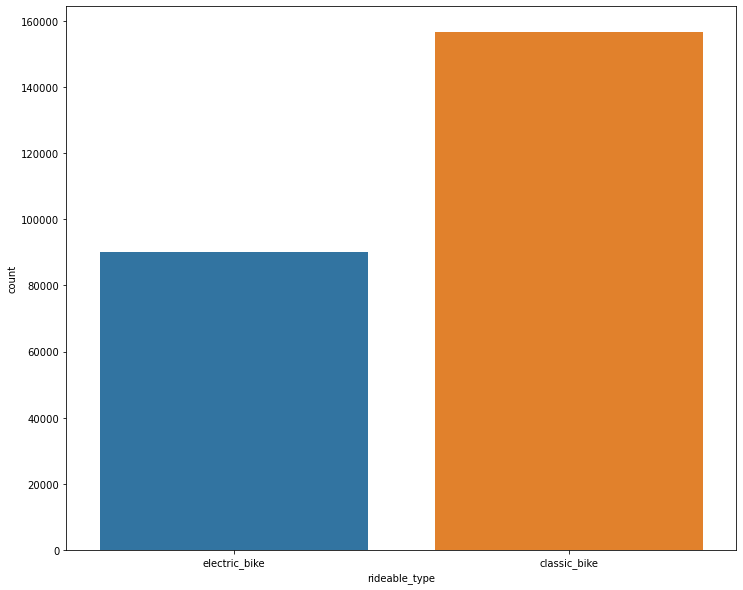

In [114]:
# Create a countplot for the type of bikes
plt.figure(figsize=(12,10))
sns.countplot(df["rideable_type"])

In this case the balance between classic bike and electric bike is around 2:1 (slightly imbalanced resample)

In [115]:
df["rideable_type"].value_counts()

classic_bike     156535
electric_bike     90104
Name: rideable_type, dtype: int64

In [120]:
classic_bike_sample = df[df["rideable_type"] == "classic_bike"].sample(n=electric_bike_count, random_state=42)

# Concatenate the electric bike sample and the sampled classic bikes to create the balanced DataFrame
balanced_df = pd.concat([electric_bike_sample, classic_bike_sample])

In [122]:
balanced_df["rideable_type"].value_counts()

classic_bike     90104
electric_bike    78267
Name: rideable_type, dtype: int64

<AxesSubplot:xlabel='rideable_type', ylabel='count'>

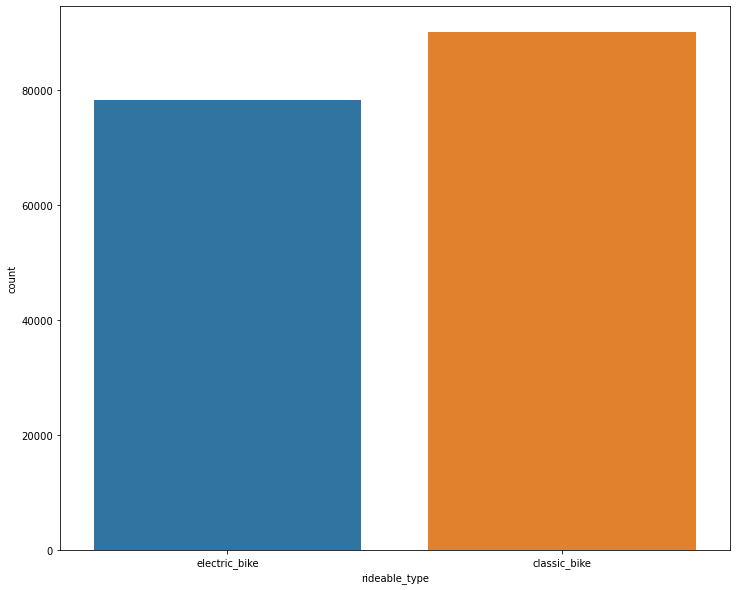

In [123]:
plt.figure(figsize=(12,10))
sns.countplot(balanced_df["rideable_type"])

In [124]:
df = balanced_df

### One Hot Encoding
One-hot encoding is an essential technique for data scientists, used to convert multiclass categorical data into integer representations. For binary classification, we typically represent one class as 0 and the other as 1. However, for multiclass scenarios, we break the data into multiple columns, each representing a class. Importantly, we only need \( n-1 \) columns for \( n \) classes. This is because if all the other columns are 0, we can infer that the remaining class must be 1. Essentially, one class is dependent on the others.

Many people might initially think that we can simply use 1 for one class, 2 for the next class, 3 for the following class, and so on. However, this approach can bias our machine learning algorithms, as it may inadvertently assign more importance to higher numerical values. Instead, we use one-hot encoding to avoid this issue. For example, with four classes, one-hot encoding would represent them as (1,0,0,0), (0,1,0,0), (0,0,1,0), and (0,0,0,1). This way, each class is treated equally, and no unintended hierarchical relationship is introduced. We can drop one of the columns listed to reduce the number of features.

In [125]:
# Create one hot encodings for the rideable_type and member_casual
df = pd.get_dummies(df, columns=['rideable_type', 'member_casual'], drop_first=True)

# Print out top of table to check
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member
233924,2024-02-20 17:08:00,2024-02-20 17:29:00,15th St & Massachusetts Ave SE,7th & Monroe St NE,38.887321,-76.983589,38.932243,-76.996133,21.0,1,0
124737,2024-02-19 13:22:00,2024-02-19 13:29:00,14th & R St NW,17th & P St NW,38.912985,-77.031796,38.909858,-77.038566,7.0,1,1
165629,2024-02-25 10:54:00,2024-02-25 11:03:00,New Hampshire Ave & T St NW,Vermont Ave & I St NW,38.915577,-77.038187,38.901136,-77.034451,9.0,1,1
12679,2024-02-09 23:10:00,2024-02-09 23:17:00,Tanner Park,5th & K St NW,38.911348,-77.002243,38.903040,-77.019027,7.0,1,1
145683,2024-02-07 11:08:00,2024-02-07 11:14:00,Fenton St & New York Ave,Silver Spring Metro / Colesville Rd & Wayne Ave,38.985336,-77.023129,38.995256,-77.029124,6.0,1,0


Let's perform some arithmetic using some of the data we already have. More specifically, we are calculating a new data point, the distance for each ride. In order to accomplish this task, we are using the Haversine Distance formula, which allows us to calculate the distacne between two ponts given their latitude and longitude coordinates. This is really helpful in the real world, as we live on a spherical ball. **MAYBE MORE FUN FACTS ABOUT HAVERSINE AND ITS USE CASES?**

In [126]:
# Create function for Haversine Distance formula
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the Haversine distance between two points given their latitude and longitude coordinates.
    """
    R = 6371  # Radius of the Earth in kilometers
    
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    
    return distance

In [127]:
# Create new distance column calculating the haversine distance for each observation
df['distance_km'] = haversine_distance(df['start_lat'], df['start_lng'], df['end_lat'], df['end_lng'])

# Print out top of table to check
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km
233924,2024-02-20 17:08:00,2024-02-20 17:29:00,15th St & Massachusetts Ave SE,7th & Monroe St NE,38.887321,-76.983589,38.932243,-76.996133,21.0,1,0,5.111630
124737,2024-02-19 13:22:00,2024-02-19 13:29:00,14th & R St NW,17th & P St NW,38.912985,-77.031796,38.909858,-77.038566,7.0,1,1,0.681198
165629,2024-02-25 10:54:00,2024-02-25 11:03:00,New Hampshire Ave & T St NW,Vermont Ave & I St NW,38.915577,-77.038187,38.901136,-77.034451,9.0,1,1,1.637918
12679,2024-02-09 23:10:00,2024-02-09 23:17:00,Tanner Park,5th & K St NW,38.911348,-77.002243,38.903040,-77.019027,7.0,1,1,1.721211
145683,2024-02-07 11:08:00,2024-02-07 11:14:00,Fenton St & New York Ave,Silver Spring Metro / Colesville Rd & Wayne Ave,38.985336,-77.023129,38.995256,-77.029124,6.0,1,0,1.218757


In [128]:
# Print out number of unique start stations
df["start_station_name"].nunique()

757

In [129]:
# Print out count for each station name
df["start_station_name"].value_counts()

Columbus Circle / Union Station                        2428
New Hampshire Ave & T St NW                            2016
15th & P St NW                                         1702
Eastern Market Metro / Pennsylvania Ave & 8th St SE    1508
5th & K St NW                                          1492
                                                       ... 
The Shoppes @ Burnt Mills                                 1
Stewart Ln & Old Columbia Pike                            1
Green Range Dr and Glade Dr                               1
Ridge Rd & Southern Ave SE                                1
Becontree Ln & Goldenrain Ct                              1
Name: start_station_name, Length: 757, dtype: int64

Let's calculate another new data point. In this case, we are calculating average speed, as we believe this may be another metric which could give us valuable insight into our goal. **WHAT IS OUR GOAL?**

In [130]:
# Calculate the time duration of the trip in minutes
df["time_duration"] = (df["ended_at"] - df["started_at"]).astype('timedelta64[m]')

In [131]:
# Calculate new column average speed
df["average_speed"] = df["distance_km"] / df["time_duration"] * 60

# Print out top of table to check
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
233924,2024-02-20 17:08:00,2024-02-20 17:29:00,15th St & Massachusetts Ave SE,7th & Monroe St NE,38.887321,-76.983589,38.932243,-76.996133,21.0,1,0,5.111630,14.604656
124737,2024-02-19 13:22:00,2024-02-19 13:29:00,14th & R St NW,17th & P St NW,38.912985,-77.031796,38.909858,-77.038566,7.0,1,1,0.681198,5.838841
165629,2024-02-25 10:54:00,2024-02-25 11:03:00,New Hampshire Ave & T St NW,Vermont Ave & I St NW,38.915577,-77.038187,38.901136,-77.034451,9.0,1,1,1.637918,10.919455
12679,2024-02-09 23:10:00,2024-02-09 23:17:00,Tanner Park,5th & K St NW,38.911348,-77.002243,38.903040,-77.019027,7.0,1,1,1.721211,14.753241
145683,2024-02-07 11:08:00,2024-02-07 11:14:00,Fenton St & New York Ave,Silver Spring Metro / Colesville Rd & Wayne Ave,38.985336,-77.023129,38.995256,-77.029124,6.0,1,0,1.218757,12.187569


In [132]:
# Print out count for different values of time duration
df["time_duration"].value_counts()

5.0       12659
6.0       12620
7.0       12159
4.0       11763
8.0       11511
          ...  
952.0         1
1065.0        1
1170.0        1
715.0         1
1034.0        1
Name: time_duration, Length: 390, dtype: int64

### Some Exploratory Analysis #2
Now, let's perform some exploratory analysis. We are trying to see the frequency of observations, which fall within the variety of time durations. As we can see from the graph, we know that a large majority of the data points lie below 200 minutes. Therefore, we have the choice of removing any data points above 200 minutes, as they may be outliers. WHY HISTOGRAM?

(array([1.67932e+05, 3.05000e+02, 3.00000e+01, 1.50000e+01, 1.20000e+01,
        1.60000e+01, 1.80000e+01, 1.80000e+01, 1.50000e+01, 1.00000e+01]),
 array([   0. ,  149.6,  299.2,  448.8,  598.4,  748. ,  897.6, 1047.2,
        1196.8, 1346.4, 1496. ]),
 <BarContainer object of 10 artists>)

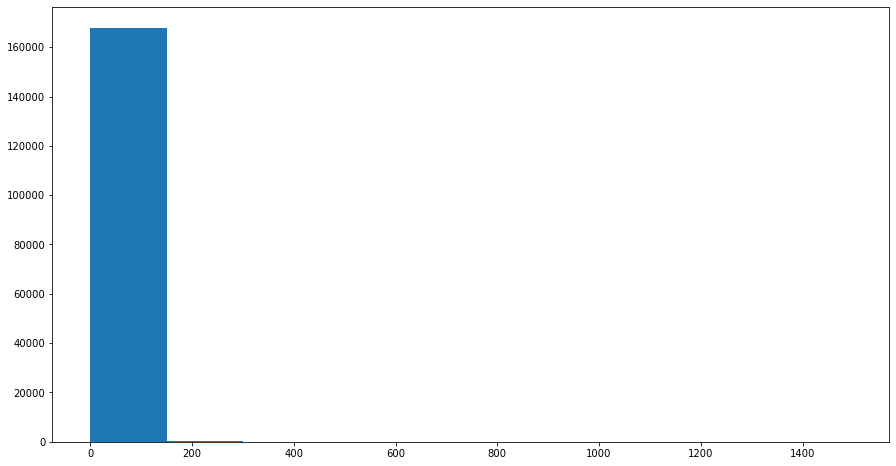

In [133]:
# Plot a histogram of time duration
plt.figure(figsize=(15,8))
plt.hist(df["time_duration"])

In [134]:
# List out columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168371 entries, 233924 to 31740
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   started_at                   168371 non-null  datetime64[ns]
 1   ended_at                     168371 non-null  datetime64[ns]
 2   start_station_name           168371 non-null  object        
 3   end_station_name             168371 non-null  object        
 4   start_lat                    168371 non-null  float64       
 5   start_lng                    168371 non-null  float64       
 6   end_lat                      168371 non-null  float64       
 7   end_lng                      168371 non-null  float64       
 8   time_duration                168371 non-null  float64       
 9   rideable_type_electric_bike  168371 non-null  uint8         
 10  member_casual_member         168371 non-null  uint8         
 11  distance_km           

Next, let's drop some unreasonable data points. In this code, we'll drop any time durations equal to 0 minutes, as such a bike ride was not a complete trip. WHAT MIGHT THIS DO TO OUR DATA?

In [135]:
# Drop time durations under 0 minutes, too short
df.drop(df[df["time_duration"] <= 0].index, axis = 0, inplace=True)

# Print top of table to check
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
233924,2024-02-20 17:08:00,2024-02-20 17:29:00,15th St & Massachusetts Ave SE,7th & Monroe St NE,38.887321,-76.983589,38.932243,-76.996133,21.0,1,0,5.111630,14.604656
124737,2024-02-19 13:22:00,2024-02-19 13:29:00,14th & R St NW,17th & P St NW,38.912985,-77.031796,38.909858,-77.038566,7.0,1,1,0.681198,5.838841
165629,2024-02-25 10:54:00,2024-02-25 11:03:00,New Hampshire Ave & T St NW,Vermont Ave & I St NW,38.915577,-77.038187,38.901136,-77.034451,9.0,1,1,1.637918,10.919455
12679,2024-02-09 23:10:00,2024-02-09 23:17:00,Tanner Park,5th & K St NW,38.911348,-77.002243,38.903040,-77.019027,7.0,1,1,1.721211,14.753241
145683,2024-02-07 11:08:00,2024-02-07 11:14:00,Fenton St & New York Ave,Silver Spring Metro / Colesville Rd & Wayne Ave,38.985336,-77.023129,38.995256,-77.029124,6.0,1,0,1.218757,12.187569


In [136]:
# List out columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167248 entries, 233924 to 31740
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   started_at                   167248 non-null  datetime64[ns]
 1   ended_at                     167248 non-null  datetime64[ns]
 2   start_station_name           167248 non-null  object        
 3   end_station_name             167248 non-null  object        
 4   start_lat                    167248 non-null  float64       
 5   start_lng                    167248 non-null  float64       
 6   end_lat                      167248 non-null  float64       
 7   end_lng                      167248 non-null  float64       
 8   time_duration                167248 non-null  float64       
 9   rideable_type_electric_bike  167248 non-null  uint8         
 10  member_casual_member         167248 non-null  uint8         
 11  distance_km           

### Some Exploratory Analysis #3
Let's perform some more exploratory analysis. From outputting our data table early on, did you notice some peculiar data points, specifically for our 'time duration' and 'average speed' data points? Some of the values seemed a little to unrealistic, for example, a person was riding for a total of 1400 minutes, which is about 24 hours??? On the other hand for average speed, some people were traveling at 250 km/hr DOUBLE CHECK THIS VALUE?? Sometimes, unrealistic data points may have been a result of an error or mistake in the data collection phase. Therefore, it is important to identify these points, and eliminate any points, which may seem incorrect. The graph below serves to compare these potential outliers, and identify any other ones. WHY WE PLOT AVERGAE SPEED VS TIME DURATION? MAYBE MENTION SCATTER PLOT ALSO GOOD FOR SEEING RELATIONSHIPS BETWEEN TWO VARIABLES?

Text(0, 0.5, 'Average Speed')

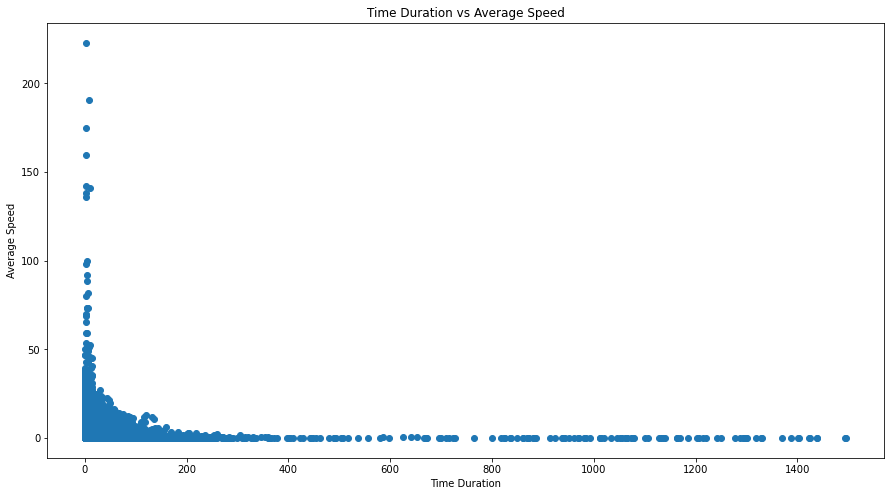

In [137]:
# Create scatter plot for average speed vs time duration
plt.figure(figsize=(15,8))
plt.scatter(df["time_duration"], df["average_speed"])
plt.title("Time Duration vs Average Speed")
plt.xlabel("Time Duration")
plt.ylabel("Average Speed")

In [138]:
# print the median average speed
df['average_speed'].median()

10.751586855356784

After examining the graph, do you notice anything noteworthy? If you look closely, you'll see that most of the average speeds are below approximately 35 km/hr, with a median of 10 km/hr. This suggests that 35 km/hr is a good upper threshold for valid data. Therefore, let's include only the data points with speeds below this threshold. Additionally, let's sort our observations by these values to easily identify the minimum and maximum average speeds.

Note: We are creating a new dataframe so that we don't change any of the values in our original dataframe. MORE REASONING?

In [139]:
# Keep observations with average speed below 35, and sort them
filtered_df = df[df['average_speed'] <= 35].sort_values(by='average_speed')

# Print out top of table to check
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
161739,2024-02-16 15:55:00,2024-02-16 17:24:00,10th St & Constitution Ave NW,10th St & Constitution Ave NW,38.893028,-77.026013,38.893028,-77.026013,89.0,0,0,0.0,0.0
41687,2024-02-22 21:05:00,2024-02-22 21:21:00,Monroe St & Monroe Pl,Monroe St & Monroe Pl,39.083673,-77.149162,39.083673,-77.149162,16.0,0,0,0.0,0.0
68585,2024-02-26 16:57:00,2024-02-26 17:35:00,Arlington Blvd & Allen St,Arlington Blvd & Allen St,38.866361,-77.199788,38.866361,-77.199788,38.0,0,0,0.0,0.0
99850,2024-02-10 16:36:00,2024-02-10 17:08:00,3rd & Underwood St NW,3rd & Underwood St NW,38.968935,-77.016263,38.968935,-77.016263,32.0,0,1,0.0,0.0
111208,2024-02-11 11:44:00,2024-02-11 11:46:00,4th & Florida Ave NE,4th & Florida Ave NE,38.907316,-77.000698,38.907316,-77.000698,2.0,0,0,0.0,0.0


Now, we will eliminate some more data points, in which seem unreaasonable. First, let's get rid of any bike rides where the start and end destination were the exact same. It is most likely these individuals barely moved, therefore, leading to inaccurate data. 

In [140]:
# Drop same start and end stations
filtered_df.drop(filtered_df[filtered_df["start_station_name"] == filtered_df["end_station_name"]].index, inplace=True)

Now, let's drop data points, where an individual was traveling below 0.2 km, as this only 200 meters. Some of the fastest people in the world run this distance in less than 20 seconds. Therefore, this bike ride would be incredibly short.

In [141]:
# Drop observations with distance under 0.2 km
filtered_df.drop(filtered_df[filtered_df["distance_km"] <= .2].index, inplace=True)

Now, let's drop data points, where the time spent riding the bike was greater than 300 minutes. Sometimes, data scientists will eliminate data points based on personal intuition, rather than relying on research. It is usually safer to rely on research or logic to back up your actions. However, for the purpose of this tutorial, we can agree that riding on a bike for more than 5 hours may be too long/unreasonable.

In [142]:
# Drop time durations longer than 300 minutes
filtered_df.drop(filtered_df[filtered_df["time_duration"] >= 300].index, inplace=True)

In [143]:
# print the filtered df after modifications
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
154530,2024-02-25 19:14:00,2024-02-26 00:00:00,14th & V St NW,13th & U St NW,38.917709,-77.031845,38.916936,-77.029631,286.0,1,0,0.209854,0.044025
144167,2024-02-10 13:55:00,2024-02-10 18:53:00,13th & O St NW/ Logan Circle,14th & Q St NW,38.908735,-77.029779,38.910674,-77.031880,298.0,0,0,0.282017,0.056782
5045,2024-02-26 09:58:00,2024-02-26 14:27:00,Prince St & Union St,Market Square / King St & Royal St,38.803124,-77.040363,38.804718,-77.043363,269.0,0,0,0.314635,0.070179
89191,2024-02-03 21:26:00,2024-02-04 00:21:00,21st & I St NW,22nd & I St NW / Foggy Bottom,38.900722,-77.046442,38.900880,-77.048911,175.0,1,0,0.214356,0.073494
18311,2024-02-16 15:38:00,2024-02-16 18:12:00,22nd & I St NW / Foggy Bottom,New Hampshire Ave & 24th St NW,38.900880,-77.048911,38.901755,-77.051084,154.0,0,0,0.211721,0.082489


### Some Exploratory Analysis #4
Let's perform some more exploratory analysis. Let's plot the distance traveled vs the average speed. *Why do you think we are doing this?* 
THEN PROVIDE SOME REASON

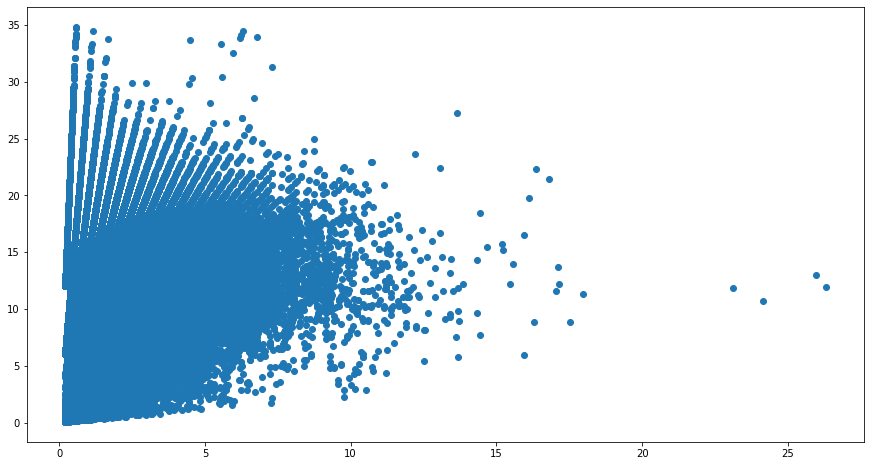

In [144]:
# Create scatter plot for average speed vs distance
plt.figure(figsize=(15,8))
plt.scatter(filtered_df["distance_km"], filtered_df["average_speed"])

### Some Exploratory Analysis #5
Let's perform some more exploratory analysis. This time, let's do something similar, but instead plot the time duration vs the average speed. *Why do you think we are doing this?* 
THEN PROVIDE SOME REASON

Text(0.5, 1.0, 'time duration vs average speed')

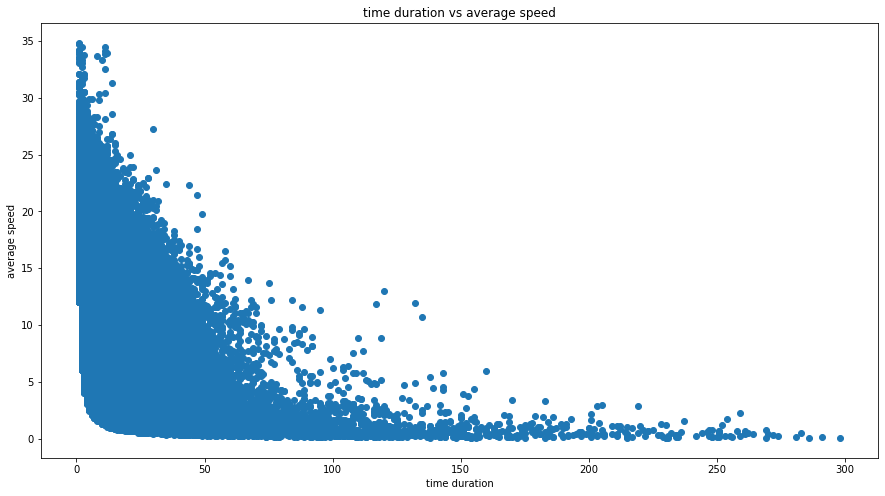

In [145]:
# Plot scatter plot for average speed vs time duration
plt.figure(figsize=(15,8))
plt.scatter(filtered_df["time_duration"], filtered_df["average_speed"])
plt.xlabel("time duration")
plt.ylabel("average speed")
plt.title("time duration vs average speed")

Let's sort the values of our distance traveled to once again better view the minimum and maxiumum value of our distance traveled data point. 

In [146]:
# Sort observations by distances
filtered_df.sort_values(by='distance_km')

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
208772,2024-02-10 07:11:00,2024-02-10 07:13:00,Rhode Island Ave Metro,MBT & Bryant St NE,38.920606,-76.995917,38.922404,-76.996023,2.0,1,0,0.200084,6.002520
12797,2024-02-29 12:48:00,2024-02-29 14:23:00,19th & G St NW,18th St & Pennsylvania Ave NW,38.898412,-77.043182,38.899680,-77.041539,95.0,0,0,0.200238,0.126466
52290,2024-02-07 18:01:00,2024-02-07 18:02:00,19th & G St NW,18th St & Pennsylvania Ave NW,38.898412,-77.043182,38.899680,-77.041539,1.0,0,1,0.200238,12.014282
142631,2024-02-05 20:24:00,2024-02-05 20:25:00,19th & G St NW,18th St & Pennsylvania Ave NW,38.898412,-77.043182,38.899680,-77.041539,1.0,0,1,0.200238,12.014282
97494,2024-02-27 18:33:00,2024-02-27 18:35:00,18th St & Pennsylvania Ave NW,19th & G St NW,38.899680,-77.041539,38.898412,-77.043182,2.0,0,1,0.200238,6.007141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229234,2024-02-24 14:47:00,2024-02-24 16:22:00,Hartland Rd & Harte Pl,Duke St & Strand (Robinson Terminal),38.878679,-77.222831,38.801947,-77.040293,95.0,1,0,17.964942,11.346279
89873,2024-02-18 15:02:00,2024-02-18 16:59:00,Wiehle-Reston Metro South,N Pershing Dr & N Wayne St,38.946638,-77.339438,38.880705,-77.085960,117.0,1,1,23.123921,11.858421
67637,2024-02-04 09:55:00,2024-02-04 12:10:00,S Four Mile Run Dr & Walter Reed Dr,W&OD Trail/Sunset Hills Rd & Isaac Newton Sq,38.847360,-77.095431,38.951443,-77.340377,135.0,0,1,24.150733,10.733659
19418,2024-02-24 07:15:00,2024-02-24 09:15:00,North Shore & Cameron Crescent Dr/Crescent Apa...,Harvard St & Adams Mill Rd NW,38.970145,-77.338663,38.927872,-77.043358,120.0,1,0,25.966048,12.983024


### We will try and determine if these values seem reasonable now, basically did we remove the sensor/data misinformation?

In [147]:
# Calculate median of time duration data points
filtered_df["time_duration"].median()

9.0

In [148]:
# Reset indices
filtered_df.reset_index(drop=True, inplace=True)

In [149]:
# Sort the distances, and print out first 50
filtered_df["distance_km"].sort_values()[:50]

15587     0.200084
32        0.200238
97907     0.200238
97908     0.200238
15613     0.200238
97906     0.200238
15702     0.200692
98295     0.200692
98294     0.200692
7698      0.200822
98440     0.200849
15731     0.200859
15732     0.200859
98444     0.200859
331       0.200859
30        0.200863
98520     0.200946
98519     0.200946
98521     0.200946
98522     0.200946
152       0.200946
7712      0.200946
5363      0.200946
98652     0.201076
98837     0.201290
98836     0.201290
98840     0.201291
15850     0.201565
15857     0.201590
15872     0.201702
4162      0.202579
16056     0.202655
16055     0.202655
62        0.202655
16053     0.202655
16054     0.202655
16052     0.202655
3396      0.202974
100371    0.202974
100372    0.202974
16106     0.202974
101115    0.203785
101114    0.203785
101113    0.203785
101112    0.203785
101110    0.203785
101111    0.203785
16228     0.203785
16229     0.203785
16230     0.203785
Name: distance_km, dtype: float64

In [150]:
# Locating one specific observation to check on google maps if the given start and end latitudes
# resulted in a distance that seemed reasonable and could be covered in that time frame
filtered_df.iloc[3830]

started_at                           2024-02-14 17:00:00
ended_at                             2024-02-14 17:34:00
start_station_name             1st & Rhode Island Ave NW
end_station_name                10th St & Florida Ave NW
start_lat                                      38.915369
start_lng                                     -77.012261
end_lat                                        38.920387
end_lng                                       -77.025672
time_duration                                       34.0
rideable_type_electric_bike                            1
member_casual_member                                   0
distance_km                                      1.28743
average_speed                                   2.271935
Name: 3830, dtype: object

In [151]:
# Print out top of table to check
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
233924,2024-02-20 17:08:00,2024-02-20 17:29:00,15th St & Massachusetts Ave SE,7th & Monroe St NE,38.887321,-76.983589,38.932243,-76.996133,21.0,1,0,5.111630,14.604656
124737,2024-02-19 13:22:00,2024-02-19 13:29:00,14th & R St NW,17th & P St NW,38.912985,-77.031796,38.909858,-77.038566,7.0,1,1,0.681198,5.838841
165629,2024-02-25 10:54:00,2024-02-25 11:03:00,New Hampshire Ave & T St NW,Vermont Ave & I St NW,38.915577,-77.038187,38.901136,-77.034451,9.0,1,1,1.637918,10.919455
12679,2024-02-09 23:10:00,2024-02-09 23:17:00,Tanner Park,5th & K St NW,38.911348,-77.002243,38.903040,-77.019027,7.0,1,1,1.721211,14.753241
145683,2024-02-07 11:08:00,2024-02-07 11:14:00,Fenton St & New York Ave,Silver Spring Metro / Colesville Rd & Wayne Ave,38.985336,-77.023129,38.995256,-77.029124,6.0,1,0,1.218757,12.187569


In [152]:
# Calculate mean of average speed for electric bikes
filtered_df[filtered_df["rideable_type_electric_bike"] == 1]["average_speed"].mean()

12.965815023969894

In [153]:
# Print top of table to check
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
0,2024-02-25 19:14:00,2024-02-26 00:00:00,14th & V St NW,13th & U St NW,38.917709,-77.031845,38.916936,-77.029631,286.0,1,0,0.209854,0.044025
1,2024-02-10 13:55:00,2024-02-10 18:53:00,13th & O St NW/ Logan Circle,14th & Q St NW,38.908735,-77.029779,38.910674,-77.031880,298.0,0,0,0.282017,0.056782
2,2024-02-26 09:58:00,2024-02-26 14:27:00,Prince St & Union St,Market Square / King St & Royal St,38.803124,-77.040363,38.804718,-77.043363,269.0,0,0,0.314635,0.070179
3,2024-02-03 21:26:00,2024-02-04 00:21:00,21st & I St NW,22nd & I St NW / Foggy Bottom,38.900722,-77.046442,38.900880,-77.048911,175.0,1,0,0.214356,0.073494
4,2024-02-16 15:38:00,2024-02-16 18:12:00,22nd & I St NW / Foggy Bottom,New Hampshire Ave & 24th St NW,38.900880,-77.048911,38.901755,-77.051084,154.0,0,0,0.211721,0.082489


In [154]:
# Calculate median of distance column
filtered_df["distance_km"].median()

1.5809754585494344

In [155]:
# This value is almost a mile, which seems reasonable for a city bike trip

### Some Exploratory Analysis #6
Let's perform some more exploratory analysis. Let's plot a histogram of the frequency of observations for our distances. *Why do you think we are doing this?* THEN PROVIDE SOME REASON.

(array([1.30672e+05, 2.64700e+04, 3.14600e+03, 5.69000e+02, 1.19000e+02,
        2.10000e+01, 1.10000e+01, 0.00000e+00, 1.00000e+00, 3.00000e+00]),
 array([ 0.200084  ,  2.81035612,  5.42062824,  8.03090035, 10.64117247,
        13.25144459, 15.8617167 , 18.47198882, 21.08226093, 23.69253305,
        26.30280517]),
 <BarContainer object of 10 artists>)

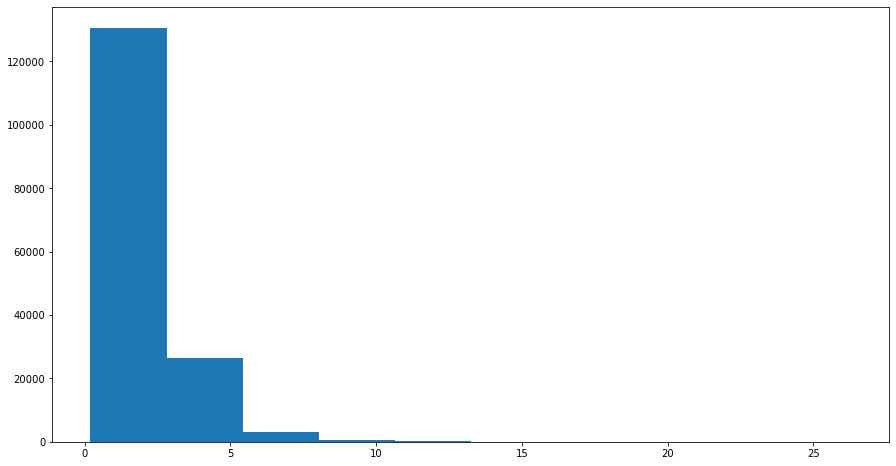

In [156]:
# Create histogram for distances
plt.figure(figsize=(15,8))
plt.hist(filtered_df["distance_km"])

### Some Interesting Data Cleaning: Ranking
Let's now create a new column, data point, called rank. This data point will represent the frequency of a start or end station being the destination across all observations. So, a higher rank for a start station indicates more people start at that station then others, while low rank means less people begin at that station. The same applies for the end station. This rank system is an example of modifying our data to be a data point that is usable. We can't really pass in string values, such as the station names, into the machine learning model. Therefore, transforming it into an integer value, such as rank, can help make it useful.

In [157]:
# Rank start stations based on occurrences
start_station_rank = filtered_df['start_station_name'].value_counts().rank(ascending=False, method='min')

# Rank stop stations based on occurrences
end_station_rank = filtered_df['end_station_name'].value_counts().rank(ascending=False, method='min')

# Assign ranks to start and stop stations
filtered_df['start_station_rank'] = filtered_df['start_station_name'].map(start_station_rank)
filtered_df['end_station_rank'] = filtered_df['end_station_name'].map(end_station_rank)

In [158]:
# Print top of table to check
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed,start_station_rank,end_station_rank
0,2024-02-25 19:14:00,2024-02-26 00:00:00,14th & V St NW,13th & U St NW,38.917709,-77.031845,38.916936,-77.029631,286.0,1,0,0.209854,0.044025,6.0,52.0
1,2024-02-10 13:55:00,2024-02-10 18:53:00,13th & O St NW/ Logan Circle,14th & Q St NW,38.908735,-77.029779,38.910674,-77.031880,298.0,0,0,0.282017,0.056782,46.0,49.0
2,2024-02-26 09:58:00,2024-02-26 14:27:00,Prince St & Union St,Market Square / King St & Royal St,38.803124,-77.040363,38.804718,-77.043363,269.0,0,0,0.314635,0.070179,359.0,326.0
3,2024-02-03 21:26:00,2024-02-04 00:21:00,21st & I St NW,22nd & I St NW / Foggy Bottom,38.900722,-77.046442,38.900880,-77.048911,175.0,1,0,0.214356,0.073494,44.0,70.0
4,2024-02-16 15:38:00,2024-02-16 18:12:00,22nd & I St NW / Foggy Bottom,New Hampshire Ave & 24th St NW,38.900880,-77.048911,38.901755,-77.051084,154.0,0,0,0.211721,0.082489,61.0,75.0


In [159]:
# Print top of table to check
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed,start_station_rank,end_station_rank
0,2024-02-25 19:14:00,2024-02-26 00:00:00,14th & V St NW,13th & U St NW,38.917709,-77.031845,38.916936,-77.029631,286.0,1,0,0.209854,0.044025,6.0,52.0
1,2024-02-10 13:55:00,2024-02-10 18:53:00,13th & O St NW/ Logan Circle,14th & Q St NW,38.908735,-77.029779,38.910674,-77.031880,298.0,0,0,0.282017,0.056782,46.0,49.0
2,2024-02-26 09:58:00,2024-02-26 14:27:00,Prince St & Union St,Market Square / King St & Royal St,38.803124,-77.040363,38.804718,-77.043363,269.0,0,0,0.314635,0.070179,359.0,326.0
3,2024-02-03 21:26:00,2024-02-04 00:21:00,21st & I St NW,22nd & I St NW / Foggy Bottom,38.900722,-77.046442,38.900880,-77.048911,175.0,1,0,0.214356,0.073494,44.0,70.0
4,2024-02-16 15:38:00,2024-02-16 18:12:00,22nd & I St NW / Foggy Bottom,New Hampshire Ave & 24th St NW,38.900880,-77.048911,38.901755,-77.051084,154.0,0,0,0.211721,0.082489,61.0,75.0


After creating new columns for data points, based off of some the existing data, we can drop the columns which cannot really be used for our machine learning model.

In [160]:
# Drop the start and end station columns
filtered_df.drop(["start_station_name", "end_station_name"], axis=1, inplace=True)

In [161]:
# Print top of table to check
filtered_df.head()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed,start_station_rank,end_station_rank
0,2024-02-25 19:14:00,2024-02-26 00:00:00,38.917709,-77.031845,38.916936,-77.029631,286.0,1,0,0.209854,0.044025,6.0,52.0
1,2024-02-10 13:55:00,2024-02-10 18:53:00,38.908735,-77.029779,38.910674,-77.031880,298.0,0,0,0.282017,0.056782,46.0,49.0
2,2024-02-26 09:58:00,2024-02-26 14:27:00,38.803124,-77.040363,38.804718,-77.043363,269.0,0,0,0.314635,0.070179,359.0,326.0
3,2024-02-03 21:26:00,2024-02-04 00:21:00,38.900722,-77.046442,38.900880,-77.048911,175.0,1,0,0.214356,0.073494,44.0,70.0
4,2024-02-16 15:38:00,2024-02-16 18:12:00,38.900880,-77.048911,38.901755,-77.051084,154.0,0,0,0.211721,0.082489,61.0,75.0


In [162]:
# Drop time columns as we already have the calculated time duration column
filtered_df.drop(["started_at", "ended_at"], axis = 1, inplace=True)

# Drop the longitude and latitude measurements since we have our calculated distance column
filtered_df.drop(["start_lat", "start_lng", "end_lat", "end_lng"], axis = 1, inplace=True)

# Print out top of table to check
filtered_df.head()

,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed,start_station_rank,end_station_rank
0,286.0,1,0,0.209854,0.044025,6.0,52.0
1,298.0,0,0,0.282017,0.056782,46.0,49.0
2,269.0,0,0,0.314635,0.070179,359.0,326.0
3,175.0,1,0,0.214356,0.073494,44.0,70.0
4,154.0,0,0,0.211721,0.082489,61.0,75.0


## Part 3: Model training and testing
Finally, we've reached the fun part of the tutorial, the part where we actually do the interesting stuff: model training and testing. Now, there are so many different machine learning models, how do we decide which one to use?

First, we need to decide if our problem is a regression or classfication problem. In our case... Based off of your problem, there are different algorithms you can use. In order to decide from here, you need to understand the algorithms, as each one has its advantages and disadvantages. But, this process may just be trial and error, testing a number of different machine learning algorithms. 

To truely understand each algorithm would be overwhelming for this tutorial, however, we will provide external links for if you want to learn more. What's important is that you get a basic understanding of each algorithm that we use in this tutorial, as well as, how we are analyzing or scoring its performance for predicting the metric we want. 

The goal of model training and testing is...

<center><img src="https://imgs.xkcd.com/comics/machine_learning.png"></center>

### Standard Scaler?

In [197]:
from sklearn.model_selection import train_test_split

# drop average speed here becuase it was included for data analysis and identifying bad sensor data. Can't use
# a variable that was created based on the dependent variable as an independent variable
X = filtered_df.drop(["rideable_type_electric_bike", "average_speed"], axis=1)
y = filtered_df['rideable_type_electric_bike']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest

In [191]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
rf = RandomForestClassifier()

In [193]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [194]:
predictions = rf.predict(X_test_scaled)

### Classification Report and Confusion Matrix
#### Evaluating Model Performance

In [195]:
from sklearn.metrics import classification_report, confusion_matrix

In [196]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75     17143
           1       0.72      0.67      0.70     15060

    accuracy                           0.73     32203
   macro avg       0.73      0.72      0.72     32203
weighted avg       0.73      0.73      0.73     32203



In [71]:
print(confusion_matrix(y_test, predictions))

[[26688  3127]
 [ 6178 11121]]


### Grid Search CV w/ Random Forest
#### Try and Improve the Model Accuracy from 80%

In [198]:
from sklearn.model_selection import GridSearchCV

In [199]:
# Define the parameter grid you want to search over
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5]
}

# Create a RandomForestRegressor instance
rf = RandomForestClassifier()

# Initialize GridSearchCV with the parameter grid and RandomForestClassifier
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the best score found
print("Best score:", grid_search.best_score_)

predictions = grid_search.predict(X_test)

/Users/ankithb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ankithb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ankithb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ankithb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warn

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.7227600278543569


ValueError: X has 5 features, but RandomForestClassifier is expecting 3 features as input.

In [200]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75     17143
           1       0.72      0.67      0.70     15060

    accuracy                           0.73     32203
   macro avg       0.73      0.72      0.72     32203
weighted avg       0.73      0.73      0.73     32203



In [201]:
print(confusion_matrix(y_test, predictions))

[[13298  3845]
 [ 4978 10082]]


In [ ]:
# start_station_rank	end_station_rank remove these columns

### Logistic Regression

In [171]:
from sklearn.linear_model import LogisticRegression

In [172]:
lr = LogisticRegression()

In [173]:
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [174]:
y_pred = lr.predict(X_test_scaled)

In [175]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71     17143
           1       0.67      0.55      0.60     15060

    accuracy                           0.66     32203
   macro avg       0.66      0.65      0.65     32203
weighted avg       0.66      0.66      0.66     32203



In [176]:
print(confusion_matrix(y_test, predictions))

[[14135  3008]
 [ 4705 10355]]


In [177]:
from sklearn.preprocessing import MinMaxScaler

In [178]:
# MinMax Scaler is better for ANN
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [179]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

### Sequential?

In [180]:
# Initialize the model
model = Sequential()

# Add layers
model.add(Dense(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=5, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [181]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Early Stopping?

In [182]:
from tensorflow.keras.callbacks import EarlyStopping

In [183]:
#stops when validation loss is not dropping for 10 epochs
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 10, verbose = 1)

In [184]:
#Fitting model
model.fit(X_train, y_train, 
          epochs = 800,
         validation_data=(X_test, y_test),
         verbose = 1, 
         callbacks=[early_stop])

Epoch 1/800
4026/4026 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.6698 - val_loss: 0.5841
Epoch 2/800
4026/4026 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.6033 - val_loss: 0.5748
Epoch 3/800
4026/4026 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.5949 - val_loss: 0.5694
Epoch 4/800
4026/4026 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.5915 - val_loss: 0.5706
Epoch 5/800
4026/4026 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5908 - val_loss: 0.5694
Epoch 6/800
4026/4026 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5889 - val_loss: 0.5724
Epoch 7/800
4026/4026 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.5867 - val_loss: 0.5724
Epoch 8/800
4026/4026 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.5871 - val_loss: 0.5700
Epoch 9/800
4026/4026 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5873 - val_loss: 0.5698
Epoch 10/800
4026/4026 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5835 - val_loss: 0.5824
Epoch 11/800
4026/4026 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.5880 - val_loss: 0.5731
Epoch 12/800
4026/4

<AxesSubplot:>

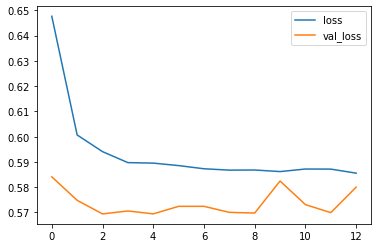

In [185]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [186]:
prediction = model.predict(X_test)

1007/1007 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step


In [187]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79     17143
           1       0.77      0.69      0.73     15060

    accuracy                           0.76     32203
   macro avg       0.76      0.76      0.76     32203
weighted avg       0.76      0.76      0.76     32203



In [188]:
print(confusion_matrix(y_test, predictions))

[[14135  3008]
 [ 4705 10355]]


## Part 4: Interpretation of Results
Interpret the results, and explain intuition behind it. Assume person does not have greatest knowledge of Data Science.

<center><img src="https://www.jotform.com/blog/wp-content/uploads/2019/10/Top-6-data-collection-methods-700x545.png"></center>

## Conclusion
Restate importance of our tutorial, and takeaways.

<center><img src="https://www.jotform.com/blog/wp-content/uploads/2019/10/Data-collection-and-lead-generation-700x545.png"></center>

## References
Include links to external sources or other info for more learning